### Case Study : E-Commerce 
### Linear Regression


<a href="https://www.kaggle.com/datasets/iabdulw/ecommerce-customer-data">Ecommerce Customer Data from the Kaggle dataset.</a>

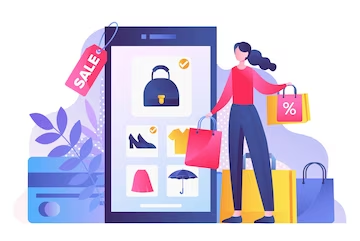

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

### Read the Dataset

In [2]:
df = pd.read_csv('/Projects/E-COMMERCE/Ecommerce-Customers.csv')
df.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [3]:
df = df.rename(columns = {'\tEmail' : 'Email'})
df.columns

Index(['Email', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

### Exploratory Data Analysis

<Axes: ylabel='Frequency'>

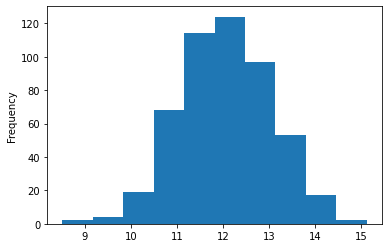

In [4]:
df['Time on App'].plot(kind='hist')

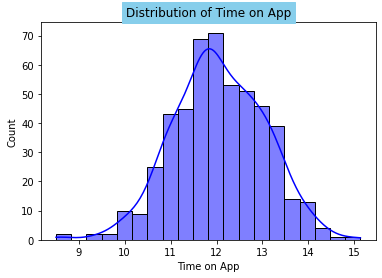

In [5]:
sns.histplot(data = df, x = 'Time on App', kde = True, color = 'b')
plt.title('Distribution of Time on App', backgroundcolor = 'skyblue')
plt.show()

<Axes: ylabel='Frequency'>

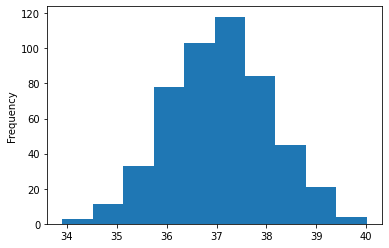

In [6]:
df['Time on Website'].plot(kind = "hist")

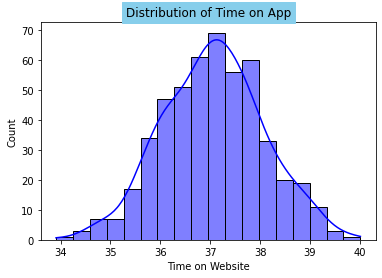

In [7]:
sns.histplot(data = df, x = 'Time on Website', kde = True, color = 'b')
plt.title('Distribution of Time on App', backgroundcolor = 'skyblue')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [9]:
df.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


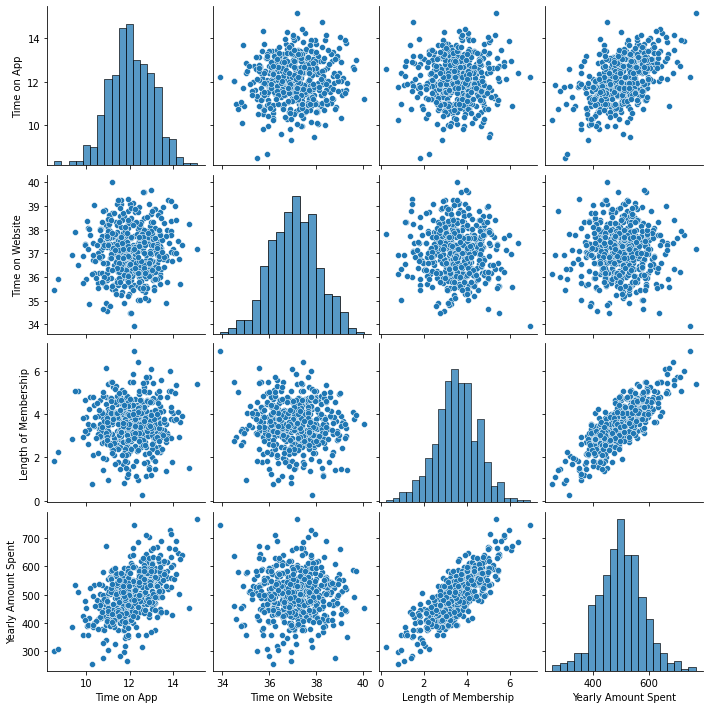

In [10]:
sns.pairplot(df)

### <font color='blue'> [Based of above , length of memebership looks to be correlated features with Yearly amount spent] </font>

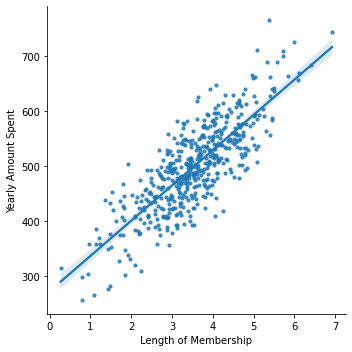

In [11]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data=df, scatter_kws={'s': 10})

In [12]:
df[['Time on App','Time on Website','Length of Membership','Yearly Amount Spent']].corr()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Time on App,1.000000,0.082285,0.029240,0.499315
Time on Website,0.082285,1.000000,-0.047443,-0.002601
Length of Membership,0.029240,-0.047443,1.000000,0.809184
Yearly Amount Spent,0.499315,-0.002601,0.809184,1.000000


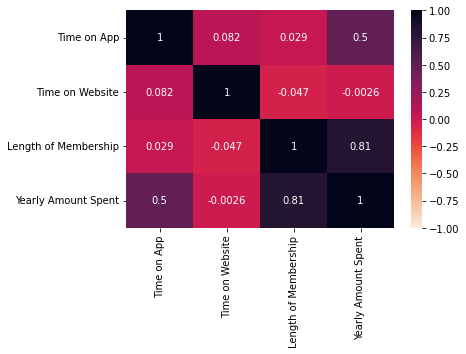

In [13]:
import seaborn as sns

sns.heatmap(df[['Time on App','Time on Website','Length of Membership','Yearly Amount Spent']].corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

### Predict the amount of money spent based on the other variable

In [14]:
X = df.select_dtypes(exclude='object').drop('Yearly Amount Spent', axis=1)
Y = df['Yearly Amount Spent']

In [15]:
#Splitting the data into test data and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [16]:
#Creating a Linear Regression model
lm = LinearRegression()

In [17]:
lm.fit(X_train,Y_train)

LinearRegression()

In [19]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Time on App,37.780436
Time on Website,0.788829
Length of Membership,62.556943


In [20]:
#Predicting the output using the mode
prediction = lm.predict(X_test)

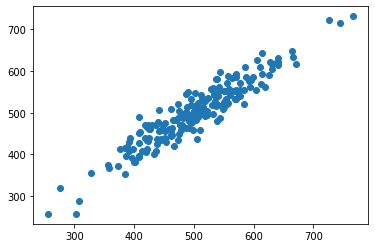

In [22]:
plt.scatter(Y_test,prediction)

In [36]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))
print('R2 Score:', metrics.r2_score(Y_test,prediction))

MAE: 22.580764688405186
MSE: 758.7991968906838
RMSE: 27.546310041286542
R2 Score: 0.8603549965886247
